## 1. Introduction

#### Libraries

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels as sm
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

The dataset used comes from kaggle. This dataset combines data sources from Netflix, Rotten Tomatoes, IMBD, posters, box office information, trailers on YouTube, and more using a variety of APIs. A unique metric called "Hidden Gem Score" has been added, which was calculated using low review count and high rating. Lower the review count and higher the user rating, higher the hidden gem score.

Using this dataset, we want to know  to have a better understanding of what Korean content is available on Nextflix France.
- How is the korean content availibility compared to other countries and how did it evolve ?
- How accessible is the content to the French audience ? The percentage of content which is dubbed in French compared to other content ?
- What is the difference between the korean content compared to the global content available in France ?

#### Read the csv file

In [2]:
data = pd.read_csv('./Data/netflix-rotten-tomatoes-metacritic-imdb.csv')
data.head()

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,NaN,NaN
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,Centigrade,"Drama, Thriller",Thrillers,English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon",...,2021-03-04,NaN,https://www.netflix.com/watch/81305978,https://www.imdb.com/title/tt8945942,"Trapped in a frozen car during a blizzard, a p...",1720.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BODM2MD...,https://www.youtube.com/watch?v=0RvV7TNUlkQ,YouTube
3,ANNE+,Drama,"TV Dramas,Romantic TV Dramas,Dutch TV Shows",Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,NaN,NaN,...,2021-03-04,NaN,https://www.netflix.com/watch/81336456,https://www.imdb.com/title/tt6132758,"Upon moving into a new place, a 20-something r...",1147.0,https://occ-0-1489-1490.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BNWRkMz...,NaN,NaN
4,Moxie,"Animation, Short, Drama","Social Issue Dramas,Teen Movies,Dramas,Comedie...",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,NaN,...,2021-03-04,NaN,https://www.netflix.com/watch/81078393,https://www.imdb.com/title/tt2023611,Inspired by her moms rebellious past and a con...,63.0,https://occ-0-4039-1500.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BODYyNW...,NaN,NaN


#### Let's take a look at our dataframe 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  15480 non-null  object 
 1   Genre                  13810 non-null  object 
 2   Tags                   15413 non-null  object 
 3   Languages              13545 non-null  object 
 4   Series or Movie        15480 non-null  object 
 5   Hidden Gem Score       13379 non-null  float64
 6   Country Availability   15461 non-null  object 
 7   Runtime                15479 non-null  object 
 8   Director               10772 non-null  object 
 9   Writer                 11150 non-null  object 
 10  Actors                 13555 non-null  object 
 11  View Rating            8456 non-null   object 
 12  IMDb Score             13381 non-null  float64
 13  Rotten Tomatoes Score  6382 non-null   float64
 14  Metacritic Score       4336 non-null   float64
 15  Aw

There are a lot of columns which aren't relevant to our questionning so we will drop them. 

In [4]:
data.drop(columns=['Director', 'Writer', 'Actors','Production House', 'Boxoffice','Netflix Link', 'IMDb Link', 'Summary',
                  'IMDb Votes', 'Image', 'Poster', 'TMDb Trailer', 'Trailer Site'], inplace=True)

We want to restrict our dataset to what is available in France, so we will drop all the content not available in France.

First we need to drop the NaN values row in the 'Country Availability' column

In [5]:
data.drop(axis=0, index=data[data['Country Availability'].isnull()].index, inplace=True)

Let's now drop the rows of movies or films not available in France

In [6]:
data.drop(axis=0, index=data[~data['Country Availability'].str.contains('France')].index, inplace=True)

As we now only have movies or TV series availble in France, we don't need the 'Country Availability' column anymore.

In [7]:
data.drop(columns=['Country Availability'], inplace=True)

We need to easily select the korean content from the dataset.

In [8]:
data['Korean content'] = ((data['Languages']=='Korean') | data['Tags'].str.contains('Korean', na=False))

Let's take a look at our dataset.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5194 entries, 4 to 15479
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  5194 non-null   object 
 1   Genre                  4861 non-null   object 
 2   Tags                   5170 non-null   object 
 3   Languages              4668 non-null   object 
 4   Series or Movie        5194 non-null   object 
 5   Hidden Gem Score       4703 non-null   float64
 6   Runtime                5194 non-null   object 
 7   View Rating            3130 non-null   object 
 8   IMDb Score             4703 non-null   float64
 9   Rotten Tomatoes Score  1858 non-null   float64
 10  Metacritic Score       1112 non-null   float64
 11  Awards Received        1916 non-null   float64
 12  Awards Nominated For   2481 non-null   float64
 13  Release Date           4692 non-null   object 
 14  Netflix Release Date   5194 non-null   object 
 15  Kor

Let's convert the 'Release Date' and 'Netflix Release Date' to date type

In [10]:
data["Release Date"] = pd.to_datetime(data["Release Date"])

In [11]:
data["Netflix Release Date"] = pd.to_datetime(data["Netflix Release Date"])

In [12]:
codebook = pd.DataFrame(data=data.columns, columns=['Variables'])

In [13]:
types = np.array(['Categorical', 'Categorical', 'Categorical', 'Categorical', 'Categorical',
                 'Numerical', 'Ordinal', 'Categorical', 'Numerical', 'Numerical',
                 'Numerical', 'Numerical', 'Numerical', 'Date', 'Date', 'Categorical'])
codebook['Types of values'] = types

In [14]:
codebook['Description'] = np.array(['Title of the movie or serie', '100s of genres', '1000s of detailed tags', 
                                    'Languagues available', 'TV Series or Movie', 'Low review count & high rating',
                                    'How long the series or movie is', 'Motion Picture Association film rating system',
                                    'Score from IMDb', 'Score from Rotten Tomatoes', 'Score from Metacritic', 
                                    'Oscar, Golden Globes, etc.', 'Oscar, Golden Globes, etc.',
                                    'When the content was released', 'When the content was released on Netflix', 
                                    'Korean content or not'])

In [15]:
codebook['Percent missing'] = (data[codebook['Variables']].isnull().sum() * 100 / len(data)).reset_index()[0]

In [16]:
codebook

,Variables,Types of values,Description,Percent missing
0,Title,Categorical,Title of the movie or serie,0.000000
1,Genre,Categorical,100s of genres,6.411244
2,Tags,Categorical,1000s of detailed tags,0.462072
3,Languages,Categorical,Languagues available,10.127070
4,Series or Movie,Categorical,TV Series or Movie,0.000000
5,Hidden Gem Score,Numerical,Low review count & high rating,9.453215
6,Runtime,Ordinal,How long the series or movie is,0.000000
7,View Rating,Categorical,Motion Picture Association film rating system,39.738159
8,IMDb Score,Numerical,Score from IMDb,9.453215
9,Rotten Tomatoes Score,Numerical,Score from Rotten Tomatoes,64.227955


As too many data is missing from 'Metacritic Score' and 'Rotten Tomatoes Score', those columns will be dropped.

In [17]:
data.drop(columns=['Rotten Tomatoes Score', 'Metacritic Score'], inplace=True)

We will replace NaN Values with Zeros in the columns 'Awards Received', 'Awards Nominated For'

In [18]:
data['Awards Received'] = data['Awards Received'].fillna(0)
data['Awards Nominated For'] = data['Awards Nominated For'].fillna(0)

Some Korean content doesn't have the language section filled in. Let's fill it in.

In [19]:
data.loc[(data['Korean content']==True) & (data['Languages'].isnull()),'Languages']='Korean'

Some movies/ films don't have a genre and tags specified, as there are few of them, they will be dropped

In [20]:
data.drop(axis=0, index=data[(data['Genre'].isnull()==True) & (data['Tags'].isnull()==True)].index, 
          inplace=True)

For tags missing, we will use the genre associated to the movie/serie

In [21]:
data['Tags'].fillna(data['Genre'], inplace=True)

For IMDb score missing, we will use the mean.

In [22]:
data['IMDb Score'].fillna(data['IMDb Score'].mean(), inplace=True)

For Hidden Gem score missing, we will use the mean.

In [23]:
data['Hidden Gem Score'].fillna(data['Hidden Gem Score'].mean(), inplace=True)

Some rows have too many information missing, let's drop these rows.

In [24]:
data.drop(axis=0, index=data[(data['Genre'].isnull()==True) & (data['Languages'].isnull()==True) &
    (data['Release Date'].isnull()==True)].index, inplace=True)

In [25]:
data[data.Languages.isnull()==True].isnull().sum() * 100 / len(data) 

Title                   0.000000
Genre                   0.041051
Tags                    0.000000
Languages               3.345649
Series or Movie         0.000000
Hidden Gem Score        0.000000
Runtime                 0.000000
View Rating             2.257800
IMDb Score              0.000000
Awards Received         0.000000
Awards Nominated For    0.000000
Release Date            0.410509
Netflix Release Date    0.000000
Korean content          0.000000
dtype: float64

Let's fill in the missing languages with the most frequent one. 

In [26]:
language_list = data['Languages'].tolist()
language_list = [str(language).split(',') for language in language_list]
language_list = [language.lstrip() for sublist in language_list for language in sublist]
languages_df = pd.DataFrame(data=language_list, columns=['language'])
frequency_languages = languages_df['language'].value_counts().to_dict()
frequency_languages

{'English': 3008,
 'French': 461,
 'Spanish': 461,
 'Hindi': 301,
 'Japanese': 294,
 'Korean': 271,
 'nan': 163,
 'German': 161,
 'Arabic': 151,
 'Italian': 115,
 'Mandarin': 90,
 'Portuguese': 85,
 'Russian': 81,
 'Swedish': 69,
 'Filipino': 67,
 'Tagalog': 64,
 'Danish': 54,
 'Turkish': 48,
 'Indonesian': 43,
 'Chinese': 43,
 'Tamil': 40,
 'Norwegian': 36,
 'Cantonese': 33,
 'Romanian': 30,
 'Thai': 28,
 'Hebrew': 26,
 'Latin': 26,
 'Dutch': 24,
 'Polish': 24,
 'None': 21,
 'Telugu': 17,
 'Urdu': 17,
 'Greek': 17,
 'Afrikaans': 16,
 'Ukrainian': 16,
 'Marathi': 16,
 'Vietnamese': 13,
 'Malay': 12,
 'Bengali': 12,
 'Yiddish': 10,
 'Yoruba': 10,
 'Catalan': 10,
 'Malayalam': 9,
 'Swahili': 9,
 'Hungarian': 9,
 'Klingon': 8,
 'Sanskrit': 8,
 'Min Nan': 7,
 'Ibo': 7,
 'Persian': 7,
 'Czech': 7,
 'Serbian': 6,
 'Zulu': 6,
 'Flemish': 6,
 'Basque': 6,
 'Xhosa': 6,
 'Finnish': 6,
 'Irish': 6,
 'American Sign Language': 5,
 'Welsh': 5,
 'Punjabi': 5,
 'Bulgarian': 5,
 'Hausa': 5,
 'Icelandic

In [27]:
data['Languages'].fillna('English', inplace=True)

There is only 11 rows left where genres is not filled in. We will drop those lines.

In [28]:
data.drop(axis=0, index=data[(data['Genre'].isnull()==True)].index, inplace=True)

Let's simplify the genre column with only one genre per content

In [29]:
genre_list = data['Genre'].tolist()
genre_list = [str(genres).split(',') for genres in genre_list]
genre_list = [genre.lstrip() for sublist in genre_list for genre in sublist]

Let's get the frequency of each genre to keep only the most frequent when there are several genres filled in for a content

In [30]:
genres_df = pd.DataFrame(data=genre_list, columns=['genre'])
frequency_genres = genres_df['genre'].value_counts().to_dict()

In [31]:
frequency_genres

{'Drama': 2077,
 'Comedy': 1854,
 'Action': 886,
 'Thriller': 843,
 'Romance': 784,
 'Animation': 659,
 'Crime': 656,
 'Adventure': 624,
 'Documentary': 578,
 'Family': 560,
 'Fantasy': 543,
 'Sci-Fi': 417,
 'Mystery': 400,
 'Horror': 298,
 'Biography': 202,
 'Short': 184,
 'History': 163,
 'Music': 161,
 'Reality-TV': 125,
 'Sport': 122,
 'Musical': 84,
 'War': 79,
 'Western': 32,
 'Game-Show': 22,
 'Talk-Show': 17,
 'News': 5,
 'Adult': 2,
 'Historical': 1,
 'Film-Noir': 1}

Let's define a function which will return the most frequent genre

In [32]:
def most_frequent_genre(item):
    list_of_word = str(item).split(", ")          
    l = [(word, frequency_genres[word]) for word in list_of_word]
    l.sort(key=lambda x:x[1], reverse=True)
    return l[0][0]

In [33]:
data['Genre'] = data['Genre'].apply(most_frequent_genre)

Lets' simplify the Tag colum with only the most frequent tag per movie or serie

In [34]:
tag_list = data['Tags'].tolist()
tag_list = [str(tags).split(',') for tags in tag_list]
tag_list = [tag.lstrip() for sublist in tag_list for tag in sublist]
tags_df = pd.DataFrame(data=tag_list, columns=['tag'])
frequency_tags = tags_df['tag'].value_counts().to_dict()
frequency_tags

{'Comedies': 1237,
 'Dramas': 1183,
 'TV Dramas': 600,
 'TV Programmes': 590,
 'International Dramas': 517,
 'Documentaries': 510,
 'Action & Adventure': 491,
 'TV Comedies': 419,
 'International Movies': 405,
 'US Movies': 376,
 'International Comedies': 373,
 'Romantic Movies': 324,
 'US TV Shows': 319,
 'Romantic Comedies': 315,
 'TV Shows': 310,
 'Romantic Dramas': 307,
 'Kids TV': 302,
 'TV Cartoons': 274,
 'Crime Movies': 247,
 'Thrillers': 244,
 'Sci-Fi & Fantasy': 234,
 'Romantic Films': 228,
 'Crime Dramas': 215,
 'Dark Comedies': 211,
 'Movies Based on Books': 210,
 'Music & Musicals': 209,
 'TV Thrillers': 197,
 'Indian Movies': 194,
 'Korean TV Shows': 187,
 'Social Issue Dramas': 187,
 'Crime Films': 184,
 'Crime Action & Adventure': 183,
 'Action Thrillers': 179,
 'Children & Family Films': 173,
 'Stand-up Comedy': 168,
 'Crime TV Dramas': 160,
 'Children & Family Movies': 158,
 'Hindi-Language Movies': 158,
 'Family Features': 157,
 'Family Comedies': 152,
 'Docuseries':

In [35]:
def most_frequent_tag(item):
    list_of_word = str(item).split(",")
    list_of_word = [word.lstrip() for word in list_of_word]
    l = [(word, frequency_tags[word]) for word in list_of_word]
    l.sort(key=lambda x:x[1], reverse=True)
    return l[0][0]

In [36]:
data['Tags'] = data['Tags'].apply(most_frequent_tag)

Let's transform the rating system to a numerical type

In [37]:
rating_system = data['View Rating'].dropna(axis=0).tolist()
rating_system = list(set(rating_system))
rating_system_dict = {
    'Approved':5,
    'PG-13':13,
    'R':12,
    'X':18,
    'GP':5,
    'TV-Y':2,
    'TV-G':5,
    'TV-Y7-FV':14,
    'TV-Y7':14,
    'TV-14':14,
    'TV-MA':14,
    'G':5,
    'PG':5,
    'TV-PG':5,
    'NC-17':17,
    'E10+':10,
    'Not Rated':5,
    'E':5,
    'Unrated':5,
    'Passed':5,
}

In [38]:
data_items = rating_system_dict.items()
data_list = list(data_items)

rating_df = pd.DataFrame(data_list, columns=['View Rating', 'Values'])
rating_df

,View Rating,Values
0,Approved,5
1,PG-13,13
2,R,12
3,X,18
4,GP,5
5,TV-Y,2
6,TV-G,5
7,TV-Y7-FV,14
8,TV-Y7,14
9,TV-14,14


In [39]:
data['View Rating'] = pd.merge(data['View Rating'], rating_df, on='View Rating', how='left')['Values']

We are replacing the missing values with the mean

In [40]:
data['View Rating'].fillna(data['View Rating'].mean(), inplace=True)

Let's transform runtime to a numerical type

In [41]:
runtime = data['Runtime'].tolist()
runtime = list(set(runtime))
runtime_dict = {'1-2 hour': 1.5, '30-60 mins':0.75, '< 30 minutes': 0.5, '> 2 hrs': 2}
runtime_df = pd.DataFrame(list(runtime_dict.items()), columns=['Runtime', 'Duration'])

In [42]:
data['Runtime'] = pd.merge(data['Runtime'], runtime_df, on='Runtime', how='left')['Duration']

We are replacing the missing values with the mean

In [43]:
data['Runtime'].fillna(data['Runtime'].mean(), inplace=True)

Let's replace the missing values in the Release Date column by the mean.

In [44]:
data['Release Date'].fillna(data['Release Date'].mean(), inplace=True)

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


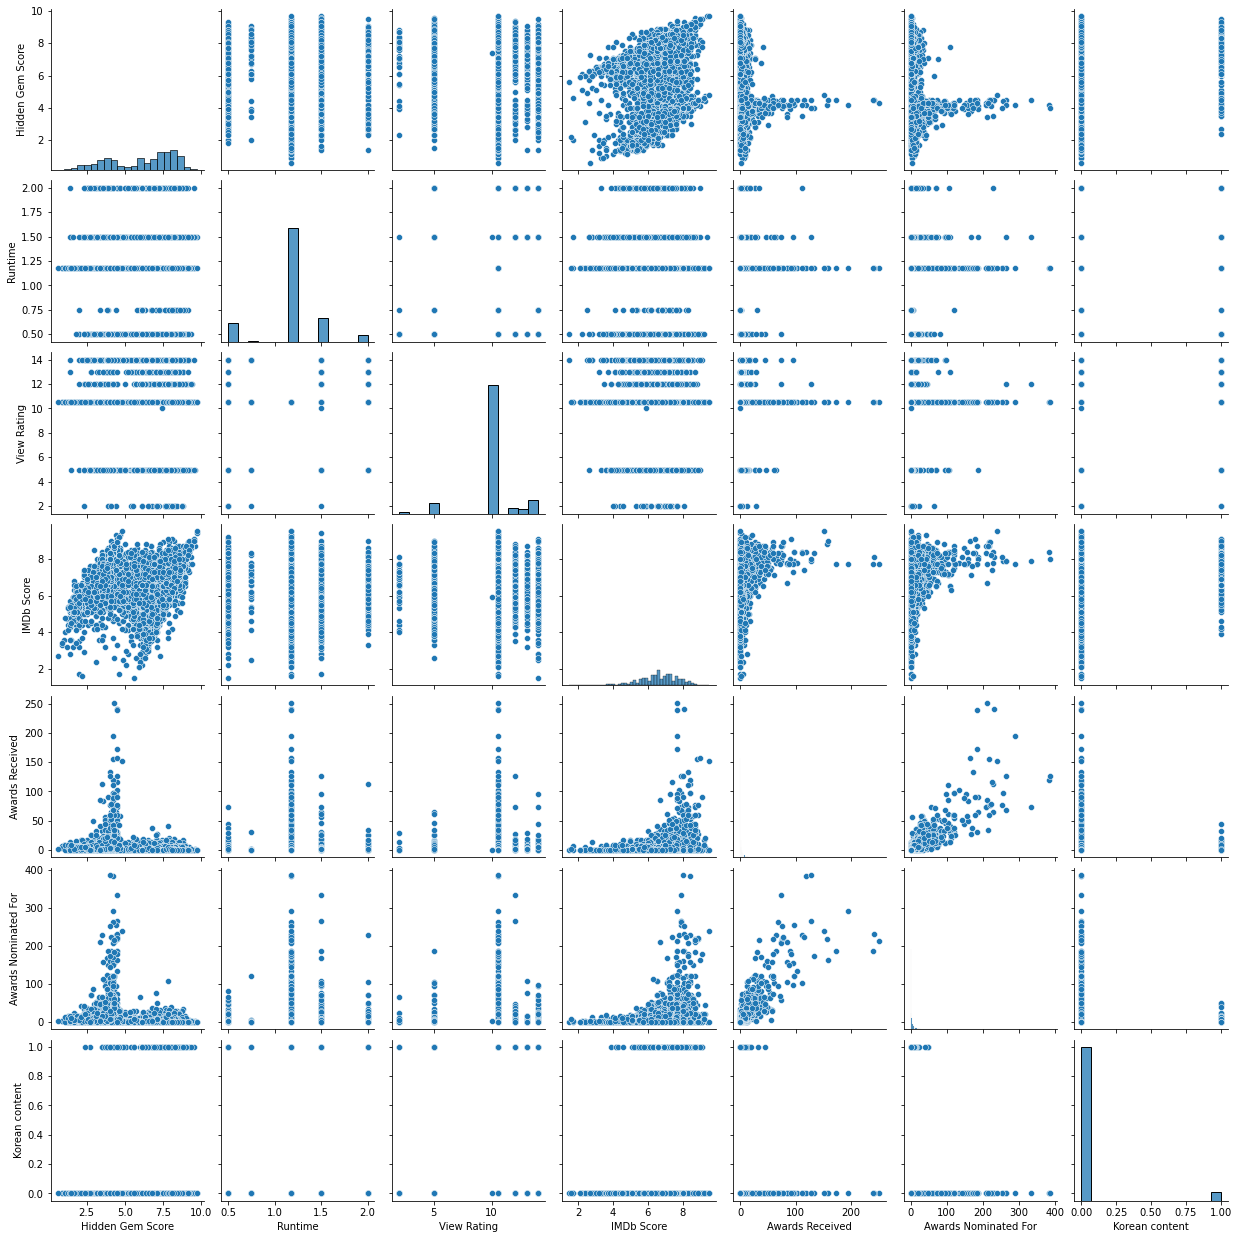

In [45]:
sns.pairplot(data)

We don't see any strong correlation.

Let's save the data into a new file

In [46]:
data.to_csv('./Data/Korean_content_on_Netflix_France.csv', index=False)